# Implementation Scikit Learn Without Feature Selection


In [1]:
from random import random
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_curve, auc
import matplotlib.pyplot as plt

# import from sckit learn
from sklearn.ensemble import RandomForestClassifier


In [2]:
train_path = "../../../data/processed/train_data.csv"  # Replace with your train file path
test_path = "../../../data/processed/test_data.csv"    # Replace with your test file path

# Assuming the target column is named 'target'
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Split features and target
X_train = train_data.drop(columns=["target"])  # Replace "target" with the actual name
y_train = train_data["target"]

X_test = test_data.drop(columns=["target"])
y_test = test_data["target"]

In [3]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [4]:
predictions = clf.predict(X_test.to_numpy())

C:\Users\unknow\Desktop\IASD S1\Parkinson_disease_classification\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [5]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [6]:
acc = accuracy(y_test, predictions)
acc

np.float64(0.925531914893617)

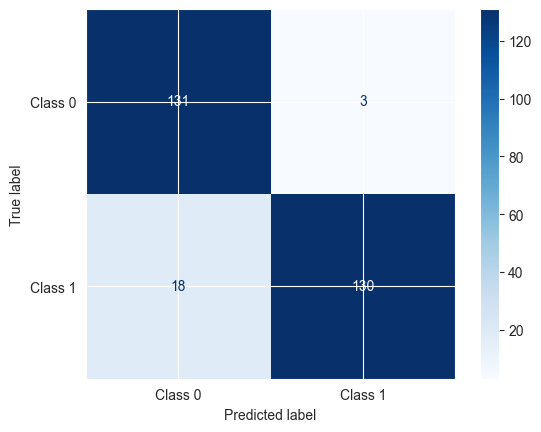

In [7]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")

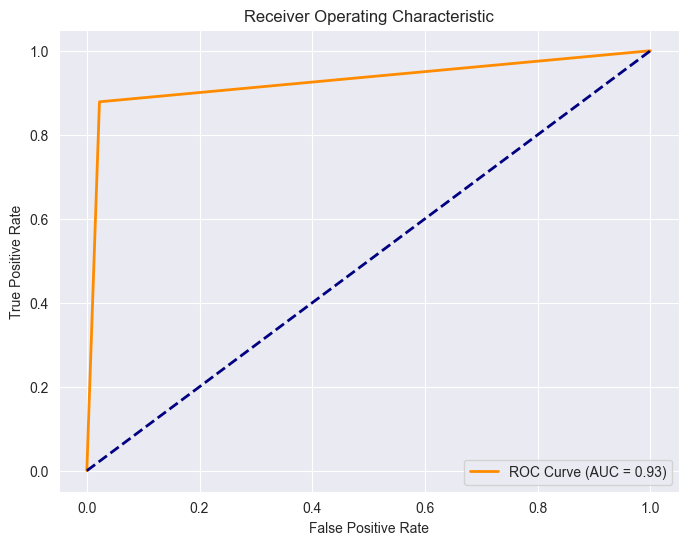

In [8]:
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()





# Implementation Scikit Learn With Feature Selection


In [9]:
train_path = "../../../data/processed/train_filtered.csv"
test_path = "../../../data/processed/test_filtered.csv"

# Assuming the target column is named 'target'
train_data_ = pd.read_csv(train_path)
test_data_ = pd.read_csv(test_path)

# Split features and target
X_train_ = train_data_.drop(columns=["target"])  # Replace "target" with the actual name
y_train_ = train_data_["target"]

X_test_ = test_data_.drop(columns=["target"])
y_test_ = test_data_["target"]



In [10]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train_, y_train_)

RandomForestClassifier(n_estimators=10)

In [11]:
predictions = clf.predict(X_test_.to_numpy())

C:\Users\unknow\Desktop\IASD S1\Parkinson_disease_classification\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [12]:
acc = accuracy(y_test_, predictions)
acc

np.float64(0.8900709219858156)

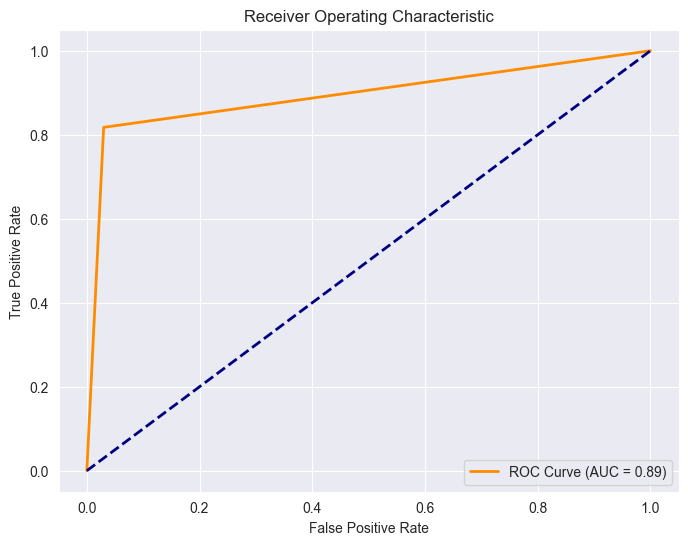

In [13]:
fpr, tpr, _ = roc_curve(y_test_, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()
